In [1]:
import numpy as np 
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import plotly.graph_objects as plotly
import plotly.express as px
import datetime
import time
from datetime import datetime

In [2]:
stations=pd.read_csv('/Users/mingyuan.xu/Desktop/archive-6/austin_bikeshare_stations.csv')
trips=pd.read_csv('/Users/mingyuan.xu/Desktop/archive-6/austin_bikeshare_trips.csv')

In [3]:
trips.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


This dataset includes the information of shared bikes, stations, time, trips and subscriber_type.

In [4]:
trips['start_time'] = pd.to_datetime(trips['start_time'])  #convert object to datetime

In [5]:
trips.head(3)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0


**Uniqueness Check:**\
First, we check the uniqueness of this dataset. Since the trip_id should be unique, we use this information to check.

In [6]:
len(trips['trip_id'].unique())==trips.shape[0]

True

It can be seen that the number of unique trip_id is equal to the number of rows of this dataset. Therefore, there is **no** repeated data in this dataset.

**Missing Data Check:**\
Next, we check whether there are some missing data in this dataset.

In [7]:
pd.isnull(trips).sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19842
end_station_name          0
month                 30752
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                  30752
dtype: int64

From this table, it can be seen that there are missing values.\
**bikeid**\
**end_station_id**\
**month**\
**start_station_id**\
**subscriber_type**\
**year**

First, we can process the missing values in colums month and year. We can use the information provided by start_time or end_time, since these two columns do not contain missing values.

In [8]:
trips['year']=pd.DatetimeIndex(trips.start_time).year
trips['month']=pd.DatetimeIndex(trips.start_time).month

In [9]:
pd.isnull(trips).sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19842
end_station_name          0
month                     0
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                      0
dtype: int64

Then, as for the end_station_id and start_station_id, we can use the informtation provided by end_station_name and start_station_name instead, since there is no missing data in these two columns.

Now, we look through the name of **end stations** and **start stations**.

In [10]:
set(trips['end_station_name'].unique())

{'11th & San Jacinto',
 '13th & San Antonio',
 '17th & Guadalupe',
 '2nd & Congress',
 '3rd & West',
 '4th & Congress',
 '5th & Bowie',
 '5th & San Marcos',
 '6th & Congress',
 '6th & Navasota St.',
 '8th & Congress',
 '8th & Guadalupe',
 'ACC - Rio Grande & 12th',
 'ACC - West & 12th',
 'ACC - West & 12th Street',
 'Barton Springs & Riverside',
 'Barton Springs @ Kinney Ave',
 'Barton Springs Pool',
 'Boardwalk West',
 'Brazos & 6th',
 'Bullock Museum @ Congress & MLK',
 'Capital Metro HQ - East 5th at Broadway',
 'Capitol Station / Congress & 11th',
 'City Hall / Lavaca & 2nd',
 'Congress & Cesar Chavez',
 'Convention Center / 3rd & Trinity',
 'Convention Center / 4th St. @ MetroRail',
 'Convention Center/ 3rd & Trinity',
 'Customer Service',
 'Davis at Rainey Street',
 'East 11th St. & San Marcos',
 'East 11th St. at Victory Grill',
 'East 11th Street at Victory Grill',
 'East 2nd & Pedernales',
 'East 4th & Chicon',
 'East 6th & Pedernales St.',
 'East 6th at Robert Martinez',
 'Ea

Note that there are two special name, **'Missing'** and **'Stolen'**. Although there is no missing data revealed above, there are still missing data in end_station_name. Another is Stolen, which means the share bikes were not being returned.

We then check the name of start stations.

In [11]:
set(trips['start_station_name'].unique())

{'11th & San Jacinto',
 '13th & San Antonio',
 '17th & Guadalupe',
 '2nd & Congress',
 '3rd & West',
 '4th & Congress',
 '5th & Bowie',
 '5th & San Marcos',
 '6th & Congress',
 '6th & Navasota St.',
 '8th & Congress',
 '8th & Guadalupe',
 'ACC - Rio Grande & 12th',
 'ACC - West & 12th',
 'ACC - West & 12th Street',
 'Barton Springs & Riverside',
 'Barton Springs @ Kinney Ave',
 'Barton Springs Pool',
 'Boardwalk West',
 'Brazos & 6th',
 'Bullock Museum @ Congress & MLK',
 'Capital Metro HQ - East 5th at Broadway',
 'Capitol Station / Congress & 11th',
 'City Hall / Lavaca & 2nd',
 'Congress & Cesar Chavez',
 'Convention Center / 3rd & Trinity',
 'Convention Center / 4th St. @ MetroRail',
 'Convention Center/ 3rd & Trinity',
 'Customer Service',
 'Davis at Rainey Street',
 'East 11th St. & San Marcos',
 'East 11th St. at Victory Grill',
 'East 11th Street at Victory Grill',
 'East 2nd & Pedernales',
 'East 4th & Chicon',
 'East 6th & Pedernales St.',
 'East 6th at Robert Martinez',
 'Ea

As for the start_stations, there is no **'missing'**, but it contains **Stolen**.

We first check the conditions of being stolen shown in end_station_name.

In [12]:
bike_stolen=trips[trips['end_station_name']=='Stolen']
bike_stolen

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
15669,19.0,17:12:35,21296,NaN,Stolen,1,2711.0,Barton Springs @ Kinney Ave,2016-01-07 17:12:35,Walk Up,9900012849,2016
31609,122.0,9:00:56,5974,NaN,Stolen,9,2565.0,Trinity & 6th Street,2016-09-02 09:00:56,Walk Up,11714202,2016
45148,8.0,20:12:00,13981,NaN,Stolen,12,2566.0,Pfluger Bridge @ W 2nd Street,2015-12-17 20:12:00,Walk Up,9900348283,2015
100999,545.0,3:12:40,7902,NaN,Stolen,11,2565.0,Trinity & 6th Street,2015-11-25 03:12:40,Walk Up,9900333086,2015
102282,384.0,9:12:36,2950,NaN,Stolen,11,2498.0,Convention Center / 4th St. @ MetroRail,2015-11-20 09:12:36,Walk Up,9900331256,2015
142018,54.0,21:12:31,3624,NaN,Stolen,11,2540.0,17th & Guadalupe,2015-11-09 21:12:31,Walk Up,9900326374,2015
168955,393.0,4:57:28,4833,NaN,Stolen,1,2561.0,State Capitol Visitors Garage @ San Jacinto & ...,2017-01-28 04:57:28,Walk Up,13564817,2017
352428,578.0,1:35:26,5189,NaN,Stolen,1,2498.0,Convention Center / 4th St. @ MetroRail,2017-01-27 01:35:26,Walk Up,13555129,2017
391694,127.0,19:12:38,3632,NaN,Stolen,10,2574.0,Zilker Park,2015-10-10 19:12:38,Walk Up,9900298869,2015
426644,327.0,6:37:15,6118,NaN,Stolen,9,2565.0,Trinity & 6th Street,2016-09-02 06:37:15,Walk Up,11712091,2016


In [114]:
pie_data = (bike_stolen['subscriber_type'].value_counts().to_frame().reset_index()
    .rename(columns={'index':'Type', 'subscriber_type':'Count'}))
pie_data

,Type,Count
0,Walk Up,14
1,Local365,1


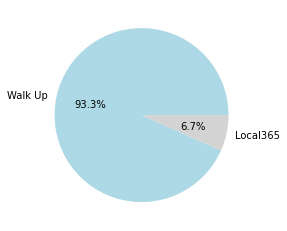

In [120]:
plt.pie(pie_data['Count'],labels=pie_data['Type'],colors=['lightblue','lightgrey'],autopct='%1.1f%%')
plt.show()

**Conclusion:** From this pie chart, it can be seen that more than 90% of the stolen bikes are caused by the walk up membership.

Then, we check the stolen in start_station_name.

In [15]:
trips[trips['start_station_name']=='Stolen']

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
312030,610.0,9:31:39,105,2565.0,Trinity & 6th Street,3,1001.0,Stolen,2017-03-18 09:31:39,Local365,14088519,2017


In [16]:
trips[trips['start_station_id']==1001.0]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
56433,60.0,9:58:24,17,2498.0,Convention Center / 4th St. @ MetroRail,3,1001.0,Main Office,2017-03-15 09:58:24,Local365,14042624,2017
144390,621.0,17:50:05,47,2542.0,Plaza Saltillo,3,1001.0,Main Office,2017-03-10 17:50:05,Weekender,13992957,2017
224278,281.0,13:14:48,3,2561.0,State Capitol Visitors Garage @ San Jacinto & ...,3,1001.0,Main Office,2017-03-20 13:14:48,Local365,14117889,2017
286933,315.0,12:37:33,198,1001.0,Main Office,3,1001.0,Main Office,2017-03-07 12:37:33,Local365,13948351,2017
312030,610.0,9:31:39,105,2565.0,Trinity & 6th Street,3,1001.0,Stolen,2017-03-18 09:31:39,Local365,14088519,2017
332829,995.0,11:12:00,22,2567.0,Palmer Auditorium,3,1001.0,Main Office,2017-03-10 11:12:00,Local30,13986174,2017
461706,409.0,16:34:57,4,3455.0,Republic Square @ Federal Courthouse Plaza,3,1001.0,Main Office,2017-03-01 16:34:57,Local365,13890701,2017
512985,957.0,15:48:33,12,2566.0,Pfluger Bridge @ W 2nd Street,3,1001.0,Main Office,2017-03-27 15:48:33,Local365,14206303,2017


Since the Stolen in start_station_name is confused, we check the 'Stolen' in start_station_name, and find its id is 1001.0. Then based on this station_id, we can find that its corresponding station_name is Main Office. Therefore, there maybe a mistake in inputting the 'Stolen', and we change the 'Stolen' in start_station_name to 'Main Office'.

In [17]:
trips["start_station_name"][312030]='Main Office'

<ipython-input-17-2a89b422873e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
trips["start_station_name"][312030]

'Main Office'

Then we check the start_station_name.

In [19]:
'Stolen' in trips['start_station_name']

False

In [20]:
trips[trips['start_station_id']==1001.0]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
56433,60.0,9:58:24,17,2498.0,Convention Center / 4th St. @ MetroRail,3,1001.0,Main Office,2017-03-15 09:58:24,Local365,14042624,2017
144390,621.0,17:50:05,47,2542.0,Plaza Saltillo,3,1001.0,Main Office,2017-03-10 17:50:05,Weekender,13992957,2017
224278,281.0,13:14:48,3,2561.0,State Capitol Visitors Garage @ San Jacinto & ...,3,1001.0,Main Office,2017-03-20 13:14:48,Local365,14117889,2017
286933,315.0,12:37:33,198,1001.0,Main Office,3,1001.0,Main Office,2017-03-07 12:37:33,Local365,13948351,2017
312030,610.0,9:31:39,105,2565.0,Trinity & 6th Street,3,1001.0,Main Office,2017-03-18 09:31:39,Local365,14088519,2017
332829,995.0,11:12:00,22,2567.0,Palmer Auditorium,3,1001.0,Main Office,2017-03-10 11:12:00,Local30,13986174,2017
461706,409.0,16:34:57,4,3455.0,Republic Square @ Federal Courthouse Plaza,3,1001.0,Main Office,2017-03-01 16:34:57,Local365,13890701,2017
512985,957.0,15:48:33,12,2566.0,Pfluger Bridge @ W 2nd Street,3,1001.0,Main Office,2017-03-27 15:48:33,Local365,14206303,2017


Now, there is no 'Stolen' in the column start_station_name.

When we analyze the duration_minutes, we can omit the rows in which end_station_id is 'Stolen', since the duration_minutes of these cases are large strangely or low strangely. It is meaningless to include these cases.

In [21]:
trips_exclude_stolen = trips[trips['end_station_name'] != 'Stolen']   #exclude the cases that bikes are stolen

In [22]:
np.average(trips_exclude_stolen['duration_minutes'])

28.987076720228707

After checking the dataset, we can find there are many rows in which the duration minutes is 0.

In [23]:
trips_exclude_stolen[trips_exclude_stolen['duration_minutes']==0]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
31,396.0,13:28:04,0,2547.0,Guadalupe & 21st,3,2547.0,Guadalupe & 21st,2017-03-26 13:28:04,Walk Up,14193229,2017
46,922.0,15:12:00,0,2562.0,San Jacinto & 8th Street,5,2562.0,San Jacinto & 8th Street,2014-05-18 15:12:00,24-Hour Kiosk (Austin B-cycle),9900132670,2014
48,442.0,16:12:00,0,2548.0,UT West Mall @ Guadalupe,4,2548.0,UT West Mall @ Guadalupe,2014-04-17 16:12:00,24-Hour Kiosk (Austin B-cycle),9900099921,2014
90,188.0,16:12:00,0,2498.0,Convention Center / 4th St. @ MetroRail,2,2496.0,8th & Congress,2015-02-06 16:12:00,Local365,9900028641,2015
309,751.0,10:12:27,0,2563.0,Davis at Rainey Street,11,2563.0,Davis at Rainey Street,2015-11-27 10:12:27,Walk Up,9900333593,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
649001,919.0,14:12:00,0,2550.0,Republic Square @ Guadalupe & 4th St.,5,2550.0,Republic Square @ Guadalupe & 4th St.,2015-05-10 14:12:00,Walk Up,9900144550,2015
649066,999.0,3:12:00,0,2548.0,UT West Mall @ Guadalupe,2,2548.0,UT West Mall @ Guadalupe,2014-02-15 03:12:00,24-Hour Kiosk (Austin B-cycle),9900023986,2014
649096,233.0,9:35:00,0,2569.0,East 11th St. & San Marcos,3,2569.0,East 11th St. & San Marcos,2016-03-06 09:35:00,Walk Up,8996347,2016
649160,759.0,18:12:00,0,2503.0,South Congress & James,9,2503.0,South Congress & James,2014-09-21 18:12:00,24-Hour Kiosk (Austin B-cycle),9900246445,2014


Some of them have the same start_station_name and end_station_name, which maybe because they give up traveling by bike and return the bike immediately. In this case, the duration time is 0. Also, it may due to the mistake or missing values, so when we calculate the average duration, we do not consider this case.\
Another case is the different name between start station and end station. In this case, there maybe mistakes or missing values in duration time, and we should not take this condition into consideration.\
We can calculate the average duration time ignoring these 2 cases.

In [24]:
trips_duration=trips_exclude_stolen[trips_exclude_stolen['duration_minutes']!=0] #exclude duration_minutes=0

In [25]:
np.average(trips_duration['duration_minutes'])  #does not change much compare to the value above

29.487192986579547

The average duration is around 30, which indicates a short-distance trip.

In [69]:
x=list(trips_duration['duration_minutes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f861f948af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f861f7fb1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f861f948790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f861f7fb8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f861f7fbfa0>],
 'means': [<matplotlib.lines.Line2D at 0x7f861f7fbc40>]}

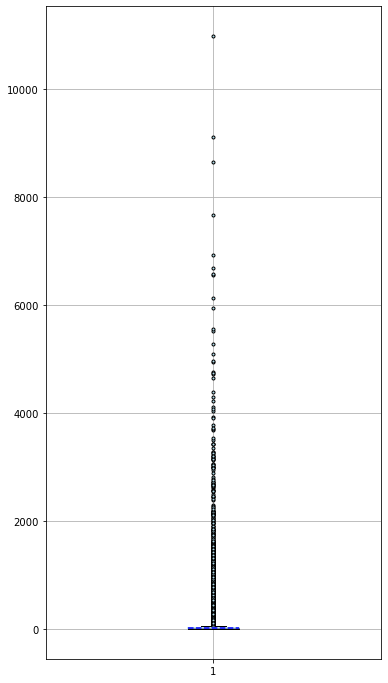

In [70]:
fig = plt.figure(figsize=(6,12))
ax = plt.subplot(111)
ax.grid(True)  # 显示网格
ax.boxplot(x,
            medianprops={'color': 'lightblue', 'linewidth': '1.5'},
            meanline=True,
            showmeans=True,
            meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
            flierprops={'marker': 'o', 'markerfacecolor': 'lightblue', 'markersize': 3})

**Conclusion:** From this boxplot, it can be seen that although the average duration time is around 30 minutes, the range of this group of data is quite large, and the maximal value is even above 10,000 minutes. In addition, most of the data is below 4000 minutes, around 3 days.

Now, we begin to consider the compaison between different year.

In [28]:
trips['year'].unique()  #there are total 5 years in this dataset

array([2015, 2016, 2014, 2017, 2013])

In [29]:
trips.groupby(['month','year']).year.count()

month  year
1      2014     3375
       2015     7765
       2016    22161
       2017    10460
2      2014     5506
       2015     9572
       2016    13355
       2017    13599
3      2014    25792
       2015    30112
       2016    29566
       2017    26532
4      2014    14461
       2015    16554
       2017    22404
5      2014    15047
       2015    15842
       2016    19560
       2017    19123
6      2014    13650
       2015    13894
       2016    16540
       2017    16108
7      2014    14346
       2015    16332
       2016    16255
       2017    14644
8      2014    11128
       2015    14523
       2016    12385
9      2014    11563
       2015    15244
       2016    15939
10     2014    22795
       2015    22864
       2016    24266
11     2014    10767
       2015    11762
       2016    14653
12     2013     1457
       2014     7273
       2015    10057
Name: year, dtype: int64

Text(0, 0.5, 'Count')

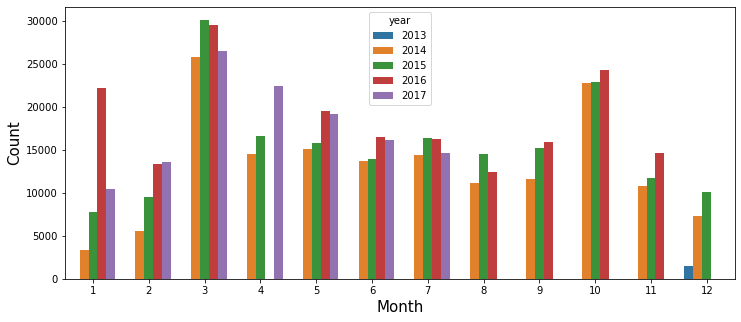

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
ax=sns.countplot(x="month", hue="year", data = trips)
ax.set_xlabel('Month',size=15)
ax.set_ylabel('Count',size=15)

**Conclusion:** From both the table and the diagram, it can be seen that only 2014 and 2015 contain the data from all the 12 months, and 2013 only contains December. Therefore, it is meanless to compare the total number of these 5 years, and it is reasonable to compare the monthly differences in 2014 and 2015.

Text(0.5, 1.0, 'No. of Trips in each month of 2014&2015')

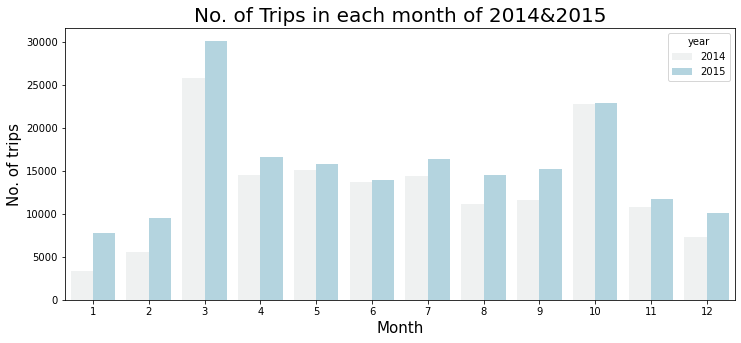

In [122]:
trips_1415 = trips[trips['year'].isin(['2014','2015'])]
trips_1415=trips_1415.groupby(['month','year']).trip_id.count()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
ax = sns.barplot(x='month', y='trip_id', hue='year', data=trips_1415.reset_index(), color='lightblue')
ax.set_xlabel('Month',size=15)
ax.set_ylabel('No. of trips',size=15)
ax.set_title('No. of Trips in each month of 2014&2015',size=20)

**Conclusion:** From this diagram, it can be seen that from 2014 to 2015, the number of trip id increased in all the months. The number of trips jumps sharply in March and Octoboer in both 2014 and 2015. The position is in Texas of America, and the season division is Spring: March-May, Summer: June-August, Fall: September-November, Winter: December-Feburary. So March and October are the ending and beginning of winter. This means that people choose to travel by bike mostly with proper temperature, and they avoid extreme temperature, especially in winter. From the digram, it can be seen that, during the winter, the number of trips is the lowest year round, and this maybe due to the low temperature in winter.\
**This diagram provides us with some instructions of allocating bikes in different months of a year.**\
**Suggestion:** Since the numbers of trips in March and October are quite large, the company of Austin Bike Share is supposed to increase the number of bikes in these months. Also, the number of employees who are responsible for the customer service should be increased in these months. In addition, in the winter, during which the number of trips is low, the company can repair and maintain their bicycles. In that case, the bikes can work well during the peak season, and the likelihood of complaints can be reduced.

Then, we take the **March in 2014** as an example to explore the change of the number of trips in a week, and compare **the number in weekdays and weekends**.

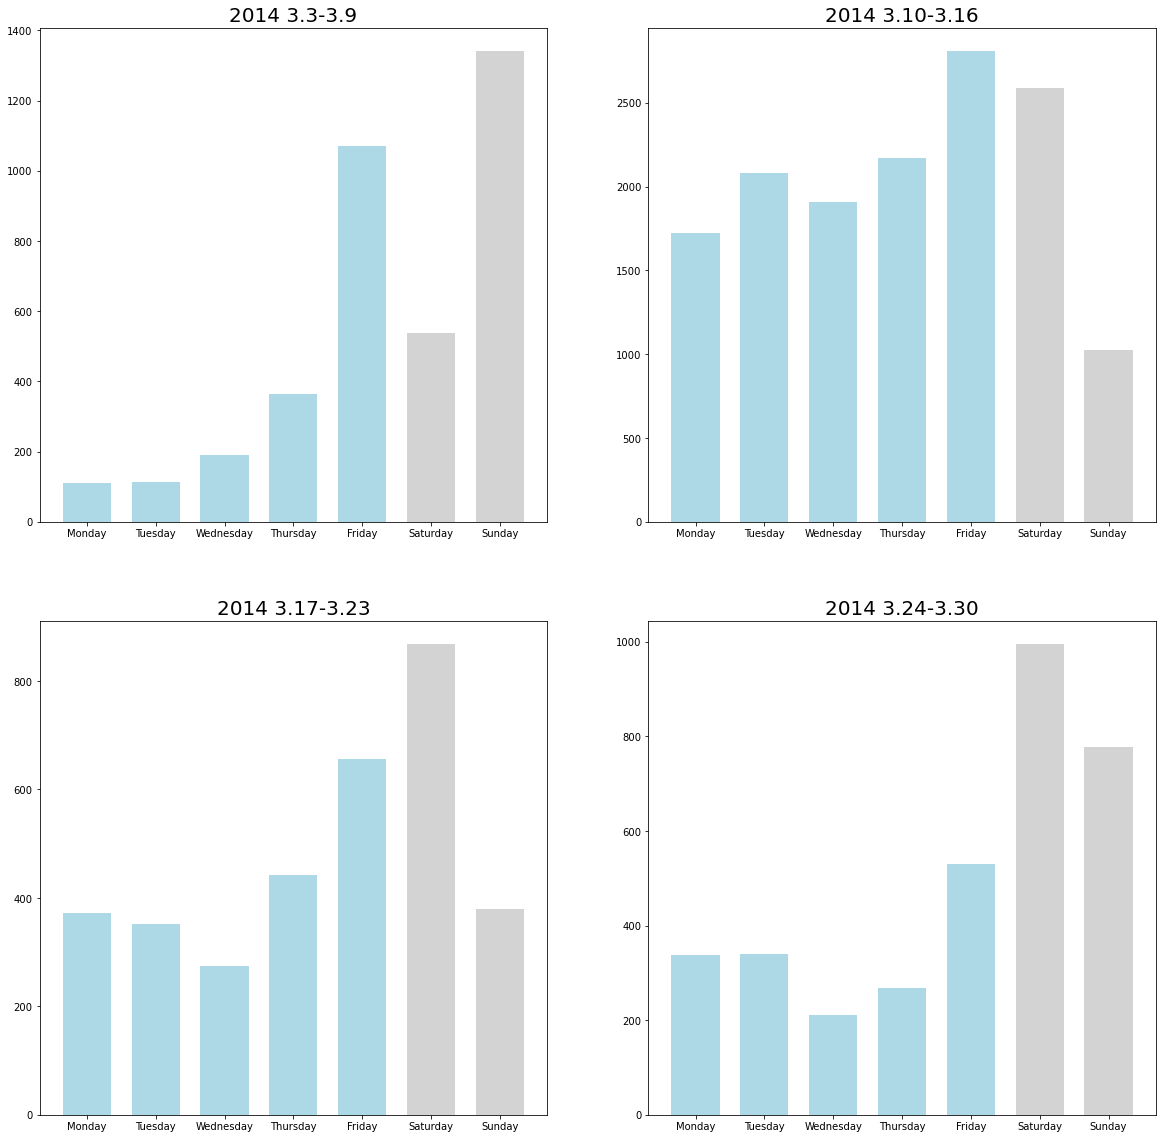

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
y_1,y_2,y_3,y_4 = [],[],[],[]
for i in range(3,10):
    df_day = trips[(trips['start_time'] >= datetime(2014, 3, i, 0, 0, 0)) & (trips['start_time'] < datetime(2014, 3, i, 23, 59, 59))]
    y_1.append(len(df_day))
    df_day = trips[(trips['start_time'] >= datetime(2014, 3, i+7, 0, 0, 0)) & (trips['start_time'] < datetime(2014, 3, i+7, 23, 59, 59))]
    y_2.append(len(df_day))
    df_day = trips[(trips['start_time'] >= datetime(2014, 3, i+14, 0, 0, 0)) & (trips['start_time'] < datetime(2014, 3, i+14, 23, 59, 59))]
    y_3.append(len(df_day))
    df_day = trips[(trips['start_time'] >= datetime(2014, 3, i+21, 0, 0, 0)) & (trips['start_time'] < datetime(2014, 3, i+21, 23, 59, 59))]
    y_4.append(len(df_day))
x = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
x_color = ['lightblue','lightblue','lightblue','lightblue','lightblue','lightgrey','lightgrey']
axes[0][0].bar(x, y_1, 0.7, color=x_color)
axes[0][0].set_title ('2014 3.3-3.9',size=20)
axes[0][1].bar(x, y_2, 0.7, color=x_color)
axes[0][1].set_title ('2014 3.10-3.16',size=20)
axes[1][0].bar(x, y_3, 0.7, color=x_color)
axes[1][0].set_title ('2014 3.17-3.23',size=20)
axes[1][1].bar(x, y_4, 0.7, color=x_color)
axes[1][1].set_title ('2014 3.24-3.30',size=20)
plt.show()

#2016.3.1 is Tuesday and we consider 4 weeks

**Conclusion:** It can been seen that during the weekends, the numbers of trips are quite large in all the 4 diagrams, especially during the last week of March in 2014.\
**This provides us with information of suggestions.**\
**Suggestion:** Since the numbers of trips in weekends are large, this means that people usually have much interest in travelling by bike or exercising by cycling on the weekends. However, there are still some days of weekends with a few number of trips, such as the Saturday in the first week. Therefore, the company of Austin Bike Share can hold some activities of cycling on the weekends to encourage residents to cycle, which can arouse their interest in cycling. This measure is possible to increase the number of trips both on the weekends and on the weekdays.

Now, we begin to explore the number of trips in different dayparts of a weekday.\
In America, one **weekday** is divided into **5 parts** in America:\
**morning drive time**(6:00–10:00 a.m.) \
**midday** (10:00 a.m.–3:00 p.m.)\
**afternoon drive** (3:00–7:00 p.m.)\
**evenings** (7:00 p.m.–midnight) \
**overnight** (midnight–6:00 a.m.).\
This is a general division of a day.



In [36]:
trips['start_time']

0        2015-03-19 19:12:00
1        2016-10-30 02:06:04
2        2016-03-11 16:28:27
3        2014-11-23 15:12:00
4        2017-04-16 15:39:13
                 ...        
649226   2014-07-06 00:12:00
649227   2017-02-06 17:20:44
649228   2015-11-18 13:12:55
649229   2016-05-29 14:45:34
649230   2015-12-08 13:12:31
Name: start_time, Length: 649231, dtype: datetime64[ns]

In [37]:
trips_Workingdays=trips[(trips.start_time.dt.weekday >=0) & (trips.start_time.dt.weekday < 5)] #trips in workingdays

In [38]:
trips_Workingdays['start_hour'] = trips_Workingdays['start_time'].dt.hour

<ipython-input-38-2fc9e87cc1a5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
trips_Workingdays['start_hour']

0         19
2         16
5         15
6         12
7         13
          ..
649223    18
649225    15
649227    17
649228    13
649230    13
Name: start_hour, Length: 394048, dtype: int64

In [40]:
conditions = [
    (trips_Workingdays['start_hour'] < 6),
    (trips_Workingdays['start_hour'] >= 6) & (trips_Workingdays['start_hour'] < 10),
    (trips_Workingdays['start_hour'] >= 10) & (trips_Workingdays['start_hour'] <15),
    (trips_Workingdays['start_hour'] >= 15) & (trips_Workingdays['start_hour'] < 19),
    (trips_Workingdays['start_hour'] >= 19) &(trips_Workingdays['start_hour'] <= 24)
    ]
values = ['overnight', 'morning drive time', 'midday','afternoon drive', 'evenings']
trips_Workingdays['Dayparts'] = np.select(conditions, values)

<ipython-input-40-972f6a8823d9>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
trips_Workingdays.head(5)    #dataset that contains start_hour and their corresponding dayparts

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,start_hour,Dayparts
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015,19,evenings
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016,16,afternoon drive
5,861.0,15:12:00,29,2537.0,West & 6th St.,5,2540.0,17th & Guadalupe,2015-05-29 15:12:00,Local30,9900153369,2015,15,afternoon drive
6,382.0,12:24:16,17,2575.0,Riverside @ S. Lamar,7,2567.0,Palmer Auditorium,2016-07-26 12:24:16,Walk Up,11114967,2016,12,midday
7,435.0,13:12:00,49,2575.0,Riverside @ S. Lamar,1,2575.0,Riverside @ S. Lamar,2015-01-15 13:12:00,Walk Up,9900005413,2015,13,midday


Text(0.5, 1.0, 'Number of trips v.s. Dayparts')

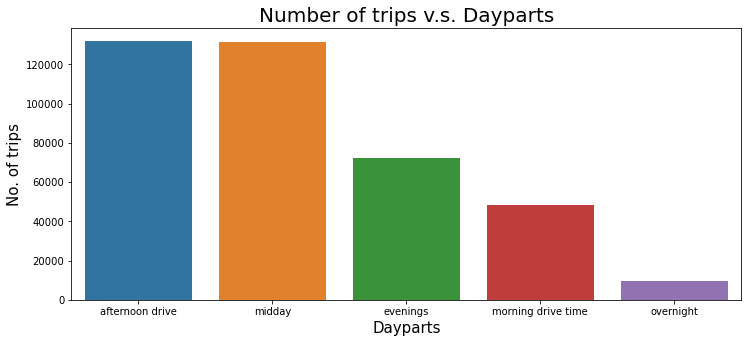

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
ax = plt.subplot(111)
sns.countplot(x='Dayparts', data=trips_Workingdays, order = trips_Workingdays['Dayparts'].value_counts().index)
ax.set_xlabel('Dayparts',size=15)
ax.set_ylabel('No. of trips',size=15)
ax.set_title('Number of trips v.s. Dayparts',size=20)

In general, the number of trips in afternoon drive and midday is roughly the same. Then, the number of trips that happen during evening is the third largest, followed by morning drive time. The lowest is the number in overnight.\
There is an obvious difference between the number of trips that happen in afternon drive and morning drive time. The reason maybe that people have much more pressure of arriving at office or school on time, so they are willing to choose vehicles that can travel more fast.

Now, we can choose some station_name that are highly used in this dataset. One row has two station names, including start_station_name and end_station_name. \
Here, we want to explore how to distribute the number of bikes at different stations in order to satisfy the need of residents, so we use the column **start_station_name**.

In [44]:
def number_trips(station_name):
    l=trips[trips['start_station_name']==station_name]
    n=l['trip_id'].count()
    return n

In [45]:
name=list(trips['start_station_name'].unique())

In [46]:
number=[]
for i in range(len(name)):
    a=number_trips(name[i])
    number.append((a,name[i]))

In [47]:
number.sort(reverse=True)

In [48]:
number_df=pd.DataFrame(number,columns=['number','station_name'])

In [49]:
number_df

,number,station_name
0,28695,Riverside @ S. Lamar
1,28535,City Hall / Lavaca & 2nd
2,26669,5th & Bowie
3,26612,2nd & Congress
4,24972,4th & Congress
...,...,...
84,9,Mobile Station @ Boardwalk Opening Ceremony
85,7,Re-branding
86,4,Mobile Station @ Unplugged
87,4,Marketing Event


Here, we take the first 10 stations in this datafram, and explore their locations on the map.

In [50]:
station_top10=stations[(stations['name']==number_df['station_name'][0])|(stations['name']==number_df['station_name'][1])
         |(stations['name']==number_df['station_name'][2])|(stations['name']==number_df['station_name'][3])
         |(stations['name']==number_df['station_name'][4])|(stations['name']==number_df['station_name'][5])|
        (stations['name']==number_df['station_name'][6])|(stations['name']==number_df['station_name'][7])|
        (stations['name']==number_df['station_name'][8])|(stations['name']==number_df['station_name'][9])]
station_top10

,latitude,location,longitude,name,station_id,status
12,30.26717,(30.26717 -97.75484),-97.75484,Pfluger Bridge @ W 2nd Street,2566,active
15,30.25579,(30.25579 -97.73982),-97.73982,Rainey St @ Cummings,2707,active
30,30.26446,(30.26446 -97.75665),-97.75665,Riverside @ S. Lamar,2575,active
41,30.26483,(30.26483 -97.739),-97.73900,Convention Center / 4th St. @ MetroRail,2498,active
43,30.26019,(30.26019 -97.73845),-97.73845,Davis at Rainey Street,2563,active
53,30.27260,(30.2726 -97.74127),-97.74127,Capitol Station / Congress & 11th,2497,active
54,30.26476,(30.26476 -97.74678),-97.74678,City Hall / Lavaca & 2nd,2499,active
66,30.26408,(30.26408 -97.74355),-97.74355,2nd & Congress,2494,active
67,30.26634,(30.26634 -97.74378),-97.74378,4th & Congress,2495,active
69,30.26960,(30.2696 -97.75332),-97.75332,5th & Bowie,2501,active


From this dataframe, it can be seen that these stations all remain **active**. Then we put them into map.

In [51]:
import folium
from folium import plugins
from folium import Choropleth, Circle, Marker
import seaborn as sns
from folium.plugins import HeatMap

In [121]:
lat=30.266822
lon=-97.742937

whole_map=folium.Map(location=[lat, lon],zoom_start=14,control_scale=True)


for lat,lon,label in zip(station_top10.latitude,station_top10.longitude,station_top10.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(color='blue', icon='cloud'),
                  popup=label).add_to(whole_map)


whole_map

From this map, it can be seen that these stations are located either along the main streets or along the river. One of them locates near the Capital Square.  **(Here the map cannot be shown in .ipynb on the website of github, so I upload the screenshot, map of top-10 stations.jpeg)**

We now explore the number of use in different dayparts of these highly used stations.

In [53]:
trips1=trips[(trips['start_station_name']==number_df['station_name'][0])|(trips['start_station_name']==number_df['station_name'][1])|
                (trips['start_station_name']==number_df['station_name'][2])|(trips['start_station_name']==number_df['station_name'][3])|
                 (trips['start_station_name']==number_df['station_name'][4])|(trips['start_station_name']==number_df['station_name'][5])|
                (trips['start_station_name']==number_df['station_name'][6])|(trips['start_station_name']==number_df['station_name'][7])|
                (trips['start_station_name']==number_df['station_name'][8])|(trips['start_station_name']==number_df['station_name'][9])]
trips1  #top10 station_name start

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017
7,435.0,13:12:00,49,2575.0,Riverside @ S. Lamar,1,2575.0,Riverside @ S. Lamar,2015-01-15 13:12:00,Walk Up,9900005413,2015
9,668.0,12:27:28,20,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,7,2575.0,Riverside @ S. Lamar,2017-07-08 12:27:28,Walk Up,15339050,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
649219,15.0,15:12:00,11,2536.0,Waller & 6th St.,5,2495.0,4th & Congress,2015-05-23 15:12:00,Walk Up,9900149936,2015
649221,853.0,19:38:03,15,2707.0,Rainey St @ Cummings,2,2501.0,5th & Bowie,2017-02-11 19:38:03,Local365,13701697,2017
649225,334.0,15:56:11,16,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,5,2575.0,Riverside @ S. Lamar,2016-05-09 15:56:11,Walk Up,9917616,2016
649228,240.0,13:12:55,44,2495.0,4th & Congress,11,2495.0,4th & Congress,2015-11-18 13:12:55,Walk Up,9900329990,2015


In [54]:
trips1_Workingdays=trips1[(trips1.start_time.dt.weekday >=0) & (trips1.start_time.dt.weekday < 5)] #trips in workingdays

In [55]:
trips1_Workingdays['start_hour'] = trips1_Workingdays['start_time'].dt.hour

<ipython-input-55-4bcc94e237f3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
conditions1 = [
    (trips1_Workingdays['start_hour'] < 6),
    (trips1_Workingdays['start_hour'] >= 6) & (trips1_Workingdays['start_hour'] < 10),
    (trips1_Workingdays['start_hour'] >= 10) & (trips1_Workingdays['start_hour'] <15),
    (trips1_Workingdays['start_hour'] >= 15) & (trips1_Workingdays['start_hour'] < 19),
    (trips1_Workingdays['start_hour'] >= 19) &(trips1_Workingdays['start_hour'] <= 24)
    ]
trips1_Workingdays['Dayparts'] = np.select(conditions1, values)

<ipython-input-56-285be7e27b29>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
trips1_Workingdays

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,start_hour,Dayparts
7,435.0,13:12:00,49,2575.0,Riverside @ S. Lamar,1,2575.0,Riverside @ S. Lamar,2015-01-15 13:12:00,Walk Up,9900005413,2015,13,midday
10,981.0,20:12:00,44,2565.0,Trinity & 6th Street,3,2563.0,Davis at Rainey Street,2014-03-14 20:12:00,24-Hour Kiosk (Austin B-cycle),9900051787,2014,20,evenings
24,14.0,12:12:00,119,2498.0,Convention Center / 4th St. @ MetroRail,5,2498.0,Convention Center / 4th St. @ MetroRail,2014-05-02 12:12:00,24-Hour Kiosk (Austin B-cycle),9900124765,2014,12,midday
45,911.0,9:12:00,10,1008.0,Nueces @ 3rd,3,2707.0,Rainey St @ Cummings,2015-03-23 09:12:00,Local365,9900087721,2015,9,morning drive time
52,219.0,17:03:37,16,2568.0,East 11th St. at Victory Grill,10,2494.0,2nd & Congress,2016-10-25 17:03:37,Walk Up,12552724,2016,17,afternoon drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649206,164.0,18:12:00,7,2542.0,Plaza Saltillo,8,2495.0,4th & Congress,2014-08-15 18:12:00,Founding Member (Austin B-cycle),9900219010,2014,18,afternoon drive
649213,275.0,15:12:00,2,2552.0,3rd & West,12,2501.0,5th & Bowie,2014-12-24 15:12:00,Local365,9900341140,2014,15,afternoon drive
649217,387.0,20:56:16,15,2563.0,Davis at Rainey Street,6,2498.0,Convention Center / 4th St. @ MetroRail,2017-06-05 20:56:16,Walk Up,15042425,2017,20,evenings
649225,334.0,15:56:11,16,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,5,2575.0,Riverside @ S. Lamar,2016-05-09 15:56:11,Walk Up,9917616,2016,15,afternoon drive


Text(0.5, 1.0, 'Number of trips v.s. Dayparts')

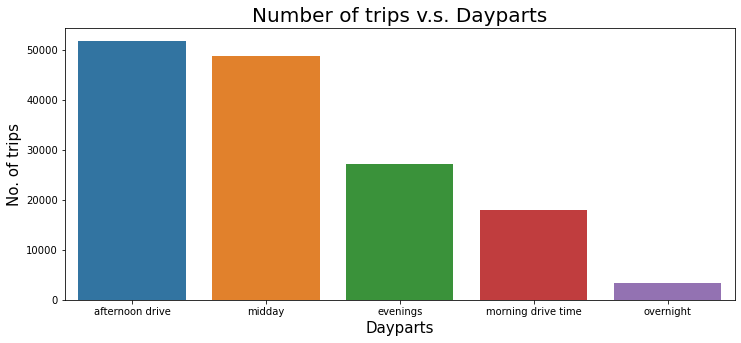

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
sns.countplot(x='Dayparts', data=trips1_Workingdays, order = trips1_Workingdays['Dayparts'].value_counts().index)
ax.set_xlabel('Dayparts',size=15)
ax.set_ylabel('No. of trips',size=15)
ax.set_title('Number of trips v.s. Dayparts',size=20)

The comparison between different dayparts is roughly the same as that derived from the complete dataset. **Afternoon drive** and **midday** has the first and second largest number.\
**This result provides us with some instructions of allocating the number of bikes of these stations at different dayparts.**\
**Suggestion:** Since both for all the stations and the top-10 stations, the numbers of trips in afternoon drive and midday are the two highest dayparts. Therefore, everyday during these two dayparts, the number of employees who are responsible for customer service shoule be increased. Also, the numbers of bike in the top-10 stations should be monitored in reducing the probability that no bike can be borrowed by residents.

Then, more specifically, we try to explore the change of the number of trips on the weekdays in August 2016.

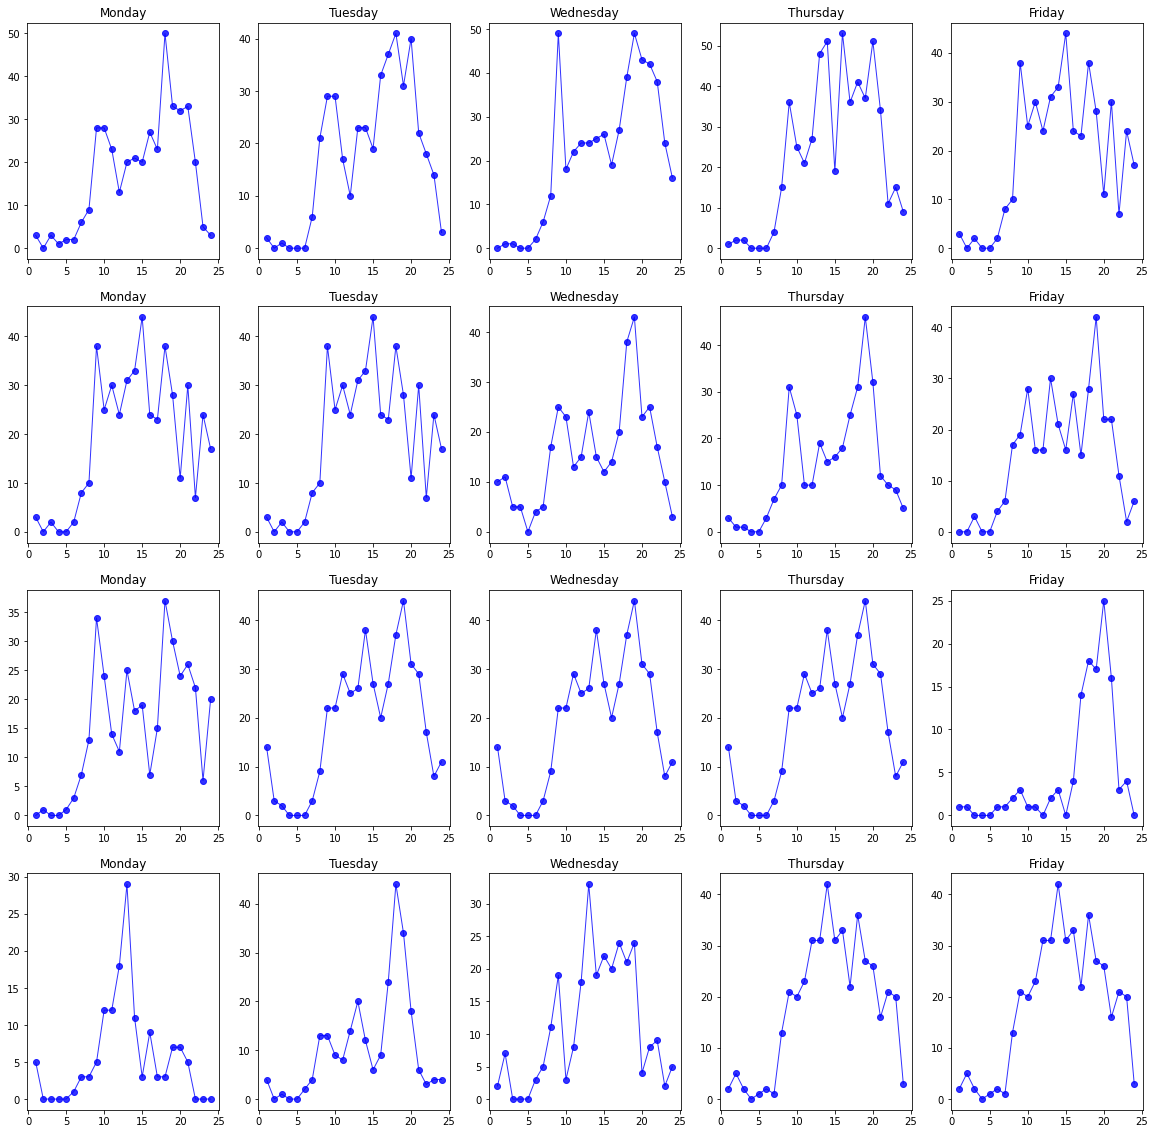

In [150]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))
Y = []
for i in range(1,29):
    if i not in [6,7,13,14,20,21,27,28]:  #not Saturday and Sunday
        y = []
        for h in range(24):
            if h != 23:
                df_hour = trips[(trips['start_time'] >= datetime(2016, 8, i, h, 0, 0)) & (trips['start_time'] < datetime(2016, 8, i, h+1, 0, 0))]
            else:
                df_hour = trips[(trips['start_time'] >= datetime(2016, 8, i, h, 0, 0)) & (trips['start_time'] < datetime(2016, 8, i+1, 0, 0, 0))]
            y.append(len(df_hour))
    Y.append(y)
for p in range(20):
    ax[p//5][p%5].plot([_ for _ in range(1,25)],Y[p],'ro-', color='blue', alpha=0.8, linewidth=1)
    if p%5 ==0:
        ax[p // 5][p % 5].set_title('Monday')
    if p%5 ==1:
        ax[p // 5][p % 5].set_title('Tuesday')
    if p%5 ==2:
        ax[p // 5][p % 5].set_title('Wednesday')
    if p%5 ==3:
        ax[p // 5][p % 5].set_title('Thursday')
    if p%5 ==4:
        ax[p // 5][p % 5].set_title('Friday')
plt.show()

#2016.8.1 is Monday and we consider 4 weeks

**Conclusion:** In most of the line chart, there is a high peak during 15-20, which roughly equal to the time interval: 15:00-19:00, which is the dayparts, afternoon drive. Therefore, the information shown in this group of diagrams is in accordance with the results shown above.

In conclusion, there are other 3 suggestions.\
**Suggestions:**
1.  Since the numbers of trips in March and October are quite large, the company of Austin Bike Share is supposed to increase the number of bikes in these months. Also, the number of employees who are responsible for the customer service should be increased in these months. In addition, in the winter, during which the number of trips is low, the company can repair and maintain their bicycles. In that case, the bikes can work well during the peak season, and the likelihood of complaints can be reduced.
2. Since the numbers of trips in weekends are large, this means that people usually have much interest in travelling by bike or exercising by cycling on the weekends. However, there are still some days of weekends with a few number of trips, such as the Saturday in the first week. Therefore, the company of Austin Bike Share can hold some activities of cycling on the weekends to encourage residents to cycle, which can arouse their interest in cycling. This measure is possible to increase the number of trips both on the weekends and on the weekdays.
3. Since both for all the stations and the top-10 stations, the numbers of trips in afternoon drive and midday are the two highest dayparts. Therefore, everyday during these two dayparts, the number of employees who are responsible for customer service shoule be increased. Also, the numbers of bike in the top-10 stations should be monitored in reducing the probability that no bike can be borrowed by residents.